<a href="https://colab.research.google.com/github/Santiagorodriguezmedina/Neural-Networks/blob/main/Feedforward_Neural_Network_(Regressions).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [92]:
# Load California housing dataset
data = fetch_california_housing()

#df = pd.DataFrame(data=housing_data.data,columns=housing_data.feature_names)
#df['Price'] = housing_data.target
#df.to_csv('california_housing_data.csv', index=False)
#files.download('california_housing_data.csv')

# Droping Columns that don't add value
X, y = data.data, data.target  # Features and target
feature_names = data.feature_names

#X_df = pd.DataFrame(X, columns=feature_names)
#X_dropped = X_df.drop(columns=['AveBedrms', 'Population','AveOccup'])
#X = X_dropped.values


In [93]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#df = pd.DataFrame(data = X_scaled)
#df.to_csv('Normalized_data.csv', index=False)
#files.download('Normalized_data.csv')
#print(df)


In [94]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(len(X_train),len(X_test),len(y_train),len(y_test))


16512 4128 16512 4128


In [95]:
# Build a simple neural network
model = Sequential([
    Dense(20, input_shape=(X.shape[1],), activation='relu'),  # Hidden layer
    Dense(1)  # Output layer (regression)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [96]:
# Compile model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

In [97]:
# Train the model
history = model.fit(X_train, y_train, epochs=1000, validation_split=0.2, verbose=0)


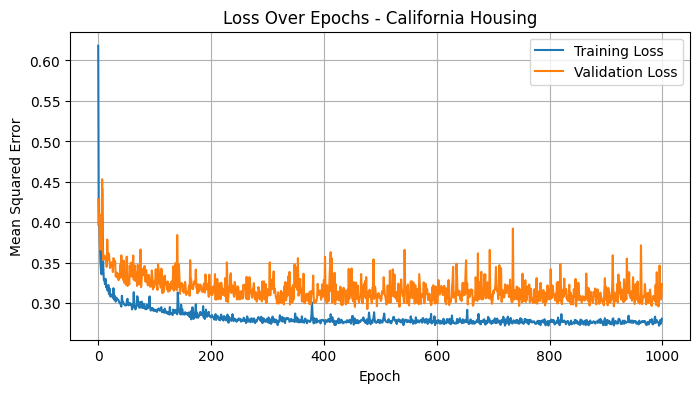

In [98]:
   # Plot training and validation loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs - California Housing')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Predicting a single value
#input_data = np.array([[-1.15248922, -0.2891866, -0.49989596, 0.20044873, 0.27936569]])
#y_pred = model.predict(input_data)
#print(y_pred)

In [101]:
# Predict on test set
y_pred = model.predict(X_test)
print(X_test)
print(y_pred)

# Calculate metrics for regressions
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[-1.15248922 -0.2891866  -0.49989596 ...  0.07768129  0.20044873
   0.27936569]
 [-0.70501534  0.10810379 -0.1574771  ... -0.03763415 -0.23028292
   0.05475686]
 [-0.20558796  1.85618152 -0.5868143  ... -0.164679    1.01509336
  -1.43265267]
 ...
 [ 2.82092723 -0.2891866   0.73104024 ... -0.02697551  0.78568194
  -1.23799169]
 [-0.57147326  0.58485227 -0.05657389 ... -0.04641411  0.53286119
  -0.09498235]
 [-0.16768875 -0.92485123 -0.58209158 ...  0.06347664 -0.66101456
   0.59880935]]
[[0.49380463]
 [1.0774996 ]
 [4.475134  ]
 ...
 [4.8876014 ]
 [0.79081726]
 [1.672074  ]]
Mean Squared Error (MSE): 0.3176
Mean Absolute Error (MAE): 0.3756
R² Score: 0.7576
